## Dados de roubas em São paulo

### 1. Instalando bibliotecas necessárias

In [8]:
pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### 2. Carregando bibliotecas

In [40]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,LineString, Polygon

### 3. Carregar dados 

In [10]:
dados = pd.read_excel("data\dados_roubo_celular_sp_2020.xlsx")

In [11]:
dados.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2020,1646238,1646238/2020,01/11/2020 00:03:07,01/11/2020 00:01:32,31/10/2020,16:30,A TARDE,31/10/2020,01/11/2020 00:03:07,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,ASUS
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,EQT9081,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE


In [12]:
# buscar o nome das colunas que tenham dados de coordenadas de latitude e longitude
dados.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'NOMEPESSOA', 'TIPOPESSOA', 'VITIMAFATAL',
       'RG', 'RG_UF', 'NATURALIDADE', 'NACIONALIDADE', 'SEXO',
       'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL', 'PROFISSAO', 'GRAUINSTRUCAO',
       'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO', 'RELACIONAMENTO',
       'PARENTESCO', 'PLACA_VEICULO', 'UF_VEICULO', 'CIDADE_VEICULO',
       'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO',
       'ANO_MODELO', 'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [14]:
#filtrar apenas as colunas de longitue e latitude
coordinates = dados[['LATITUDE', 'LONGITUDE']]

In [16]:
# remover os valores nulos
dados = dados.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [17]:
#visualizando dados 
dados.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,EQT9081,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,EQT9081,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG


### 4. Criando do Geodataframe


In [22]:
# criando a coluna de geometria
dados['geometria'] = None

for index,row in dados.iterrows():
    dados.loc[index,'geometria'] = Point(row.LONGITUDE, row.LATITUDE)

C:\Users\Rodrigo Cruz\AppData\Local\Temp\ipykernel_6772\989278170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['geometria'] = None


In [23]:
dados.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometria
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.7655849940429 -23.6863604960612)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.6093881566447 -23.6122975624363)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.7607553457118 -23.6405763334634)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.6061920346 -23.5931170972)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.6061920346 -23.5931170972)


In [25]:
type(dados)

pandas.core.frame.DataFrame

In [30]:
gdf_roubos = gpd.GeoDataFrame(dados, geometry='geometria')

In [32]:
gdf_roubos.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometria
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.76558 -23.68636)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.60939 -23.61230)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.76076 -23.64058)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.60619 -23.59312)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.60619 -23.59312)


### 5. Plotandos dados

<Axes: >

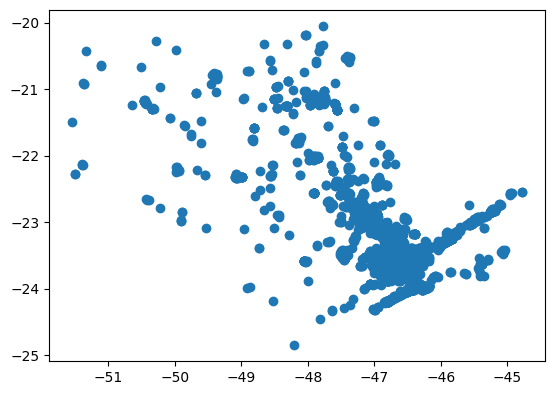

In [35]:
gdf_roubos.plot()

In [41]:
#carregando a camada do municipio de são paulo
gdf_sp = gpd.read_file('data\capital_são_paulo.json', driver='GeoJSON')

<Axes: >

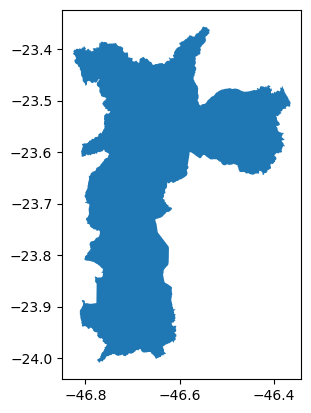

In [42]:
# mostrar a capital de sp
gdf_sp.plot()

<Axes: >

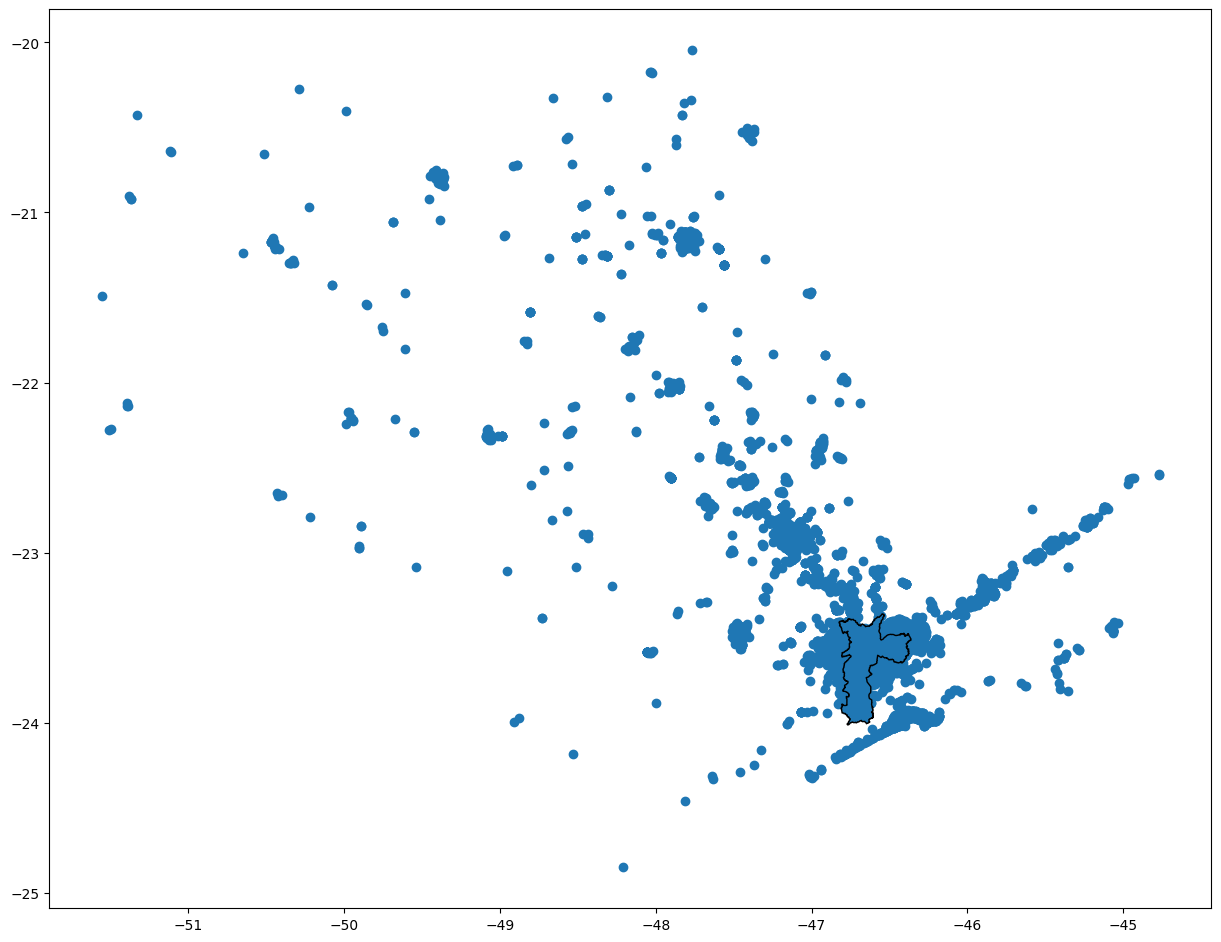

In [46]:
fig, ax = plt.subplots(figsize = (15,15))

gdf_roubos.plot(ax=ax)
gdf_sp.plot(ax=ax, facecolor=None, edgecolor='black')

### 6. Como manter apenas os dados que estão dentro da geometria da capital de São Paulo

In [47]:
#Define o poligono da capital de são paulo
poligono_sp = gdf_sp.iloc[0].geometry

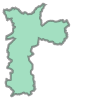

In [48]:
#Visualiza o poligono criado
poligono_sp

In [51]:
#Faz a interseçao dos dados de roubos da capital de SP com o poligono da capital
gdf_roubos_capital = gdf_roubos[gdf_roubos.intersects(poligono_sp)]

<Axes: >

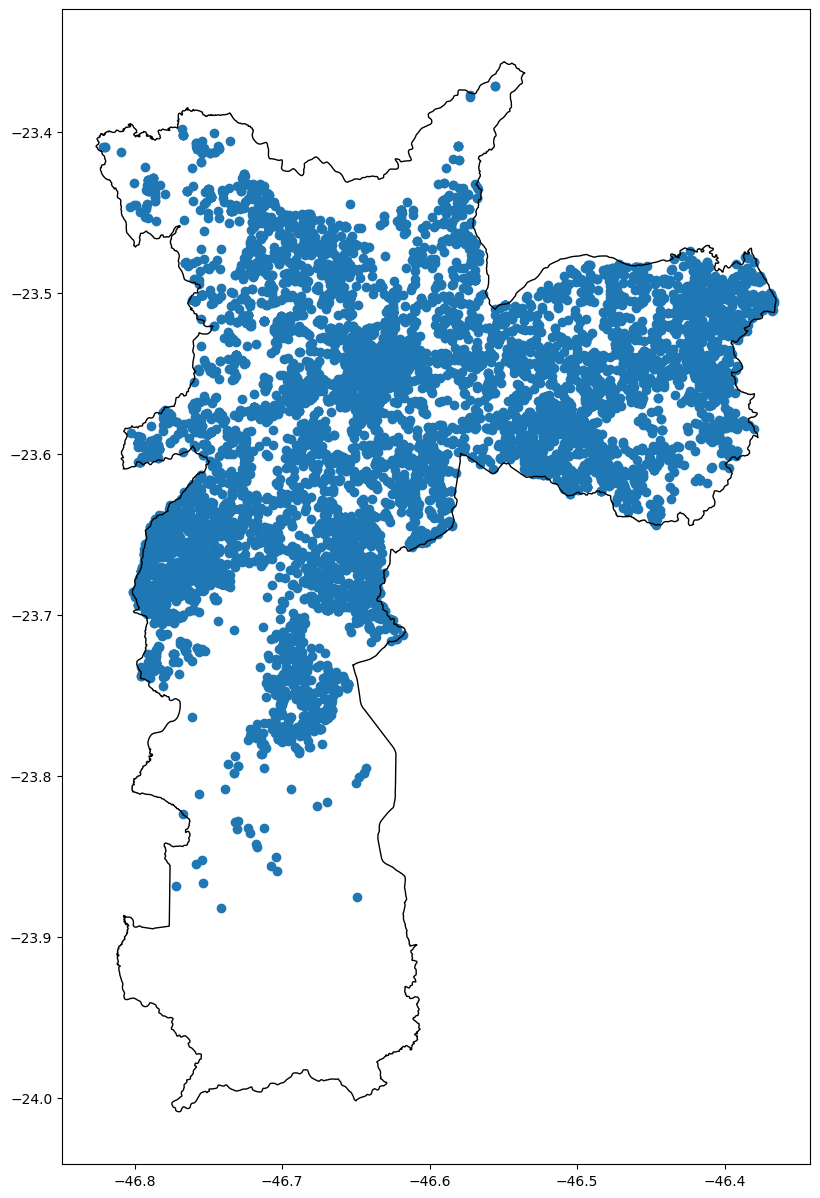

In [57]:
#Plota os dados 
fig, ax = plt.subplots(figsize = (15,15))

gdf_roubos_capital.plot(ax=ax)

gdf_sp.plot(ax=ax, facecolor='None', edgecolor='black')

In [59]:
#Salvando dados
filename = "data/_Saved/roubos_celular_capital_sp.json"

gdf_roubos.to_file(filename, driver='GeoJSON')